**Instructions**

1. In this final lab, we will model our data. Import sklearn 'train_test_split' and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check 'LinearRegressor' and 'KNeighborsRegressor'.
5. You can check also the 'MLPRegressor' for this task!
6. Check and discuss the results.

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('customer_data_cleaned.csv')

In [3]:
data = data.set_index('customer')
data.head()

,response,location_code,employment_status,education,coverage,state_California,state_Nevada,state_Oregon,state_Washington,policy_Personal,policy_Special,renew_offer_type_Offer 3-4,sales_channel_Indirect,vehicle_class_Medium-Class Car,vehicle_class_Normal Car,effective_to_date_day,effective_to_date_month,effective_to_date_year,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,1,2,1,0,0,0,0,1,0,0,0,0,0,1,24,2,2011,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,0,1,1,1,1,0,0,0,0,1,0,1,0,0,1,31,1,2011,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,0,1,2,1,2,0,1,0,0,1,0,0,0,0,1,19,2,2011,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,20,1,2011,7645.861827,0,106,18,65,0,7,529.881344
HB64268,0,0,2,1,0,0,0,0,1,1,0,0,0,0,1,3,2,2011,2813.692575,43836,73,12,44,0,1,138.130879


### 1. In this final lab, we will model our data. Import sklearn 'train_test_split' and separate the data.

In [4]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [6]:
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)

lm_predictions = lm_model.predict(X_test)

In [7]:
# I evaluate the model.
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 score:", R2)

MAE: 135.7391274197653
MSE: 34929.703275190084
RMSE: 186.89489900794533
R2 score: 0.5642440380766561


The R2 score shows how well the model fits the data. It ranges from 0 to 1, where 1 means the model fits the data perfectly and 0 means the model does not fit the data at all. The R2 score here is 0.56, which indicates that the model fits the data moderately well, but there is still room for improvement.

MAE stands for Mean Absolute Error and it measures the average difference between the actual values and the predicted values. In this case, the MAE value is 135.74, which means that on average, the model's predictions are off by around 135.74 units.

MSE stands for Mean Squared Error and it is similar to MAE but it squares the difference between the actual values and the predicted values before averaging them. The MSE value here is 34929.70, which is higher than the MAE value because it is more sensitive to outliers.

RMSE stands for Root Mean Squared Error and it is the square root of MSE. It gives us a measure of how much the predicted values deviate from the actual values, and in this case, the RMSE value is 186.89 units.

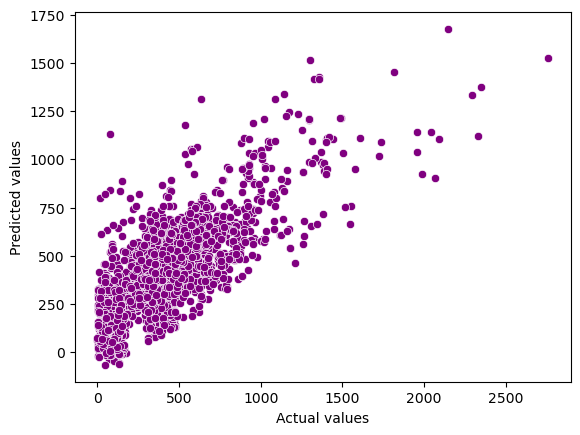

In [12]:
# I create a scatter plot of the predicted vs actual values.
sns.scatterplot(x=y_test, y=lm_predictions, color='Purple')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

### 3. Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [9]:
# First I define the function with the parameters 'model' and the different splits of the dataset.
def train_models(models, X_train, y_train, X_test, y_test):
    trained_models = []
    for model in models:
# Here I train the model on the training set.
        model.fit(X_train, y_train)
        
# To make predictions on the test set.
        predictions = model.predict(X_test)
        
# And to evaluate the model's performance.
        R2 = r2_score(y_test,predictions)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        RMSE = np.sqrt(MSE)
        
# Last, I store the trained model and evaluation metrics.
        trained_models.append((model, R2, MAE, MSE, RMSE))
    
    return trained_models

### 4. Use the function to check 'LinearRegressor' and 'KNeighborsRegressor'.

LinearRegression :

R2: 0.5642440380766561
MAE: 135.7391274197653
MSE: 34929.703275190084
RMSE: 186.89489900794533



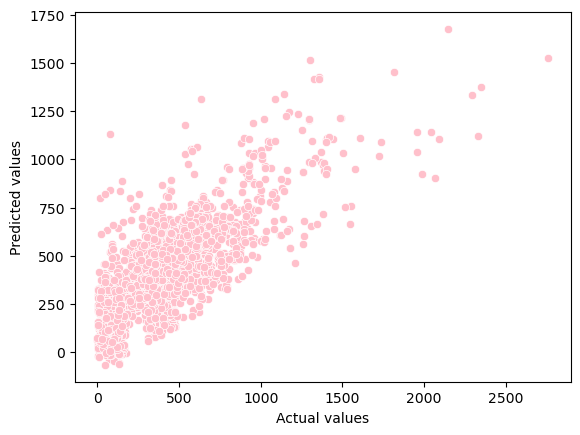

KNeighborsRegressor :

R2: 0.25001983859012944
MAE: 168.7226325068309
MSE: 60117.55842581982
RMSE: 245.18882198383315



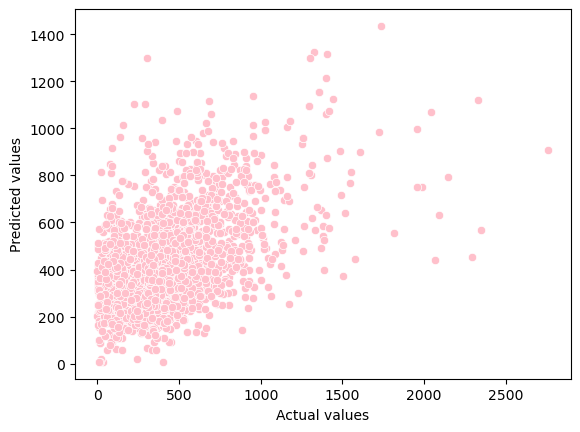

In [10]:
# I define the different models to be used.
models = [LinearRegression(), KNeighborsRegressor()]
# I train them on the dataset.
trained_models = train_models(models, X_train, y_train, X_test, y_test)

# Then I display the evaluation metrics of each model.
for model, R2, MAE, MSE, RMSE in trained_models:
    print(type(model).__name__,':')
    print() # To print an empty line.
    print("R2:", R2)
    print("MAE:", MAE)
    print("MSE:", MSE)
    print("RMSE:", RMSE)
    print() 
    
# And a scatter plot of each.
    predictions = model.predict(X_test)
    sns.scatterplot(x=y_test, y=predictions, color='Pink')
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()

### 5. You can check also the 'MLPRegressor' for this task!

Just for myself to remember: MLPs are a type of artificial neural network that consist of multiple layers of nodes, each connected to the nodes in the previous and next layers. It's used for tasks such as image recognition and natural language processing.

MLPRegressor :

R2: 0.5377468123544089
MAE: 138.00954150612887
MSE: 37053.6908117201
RMSE: 192.4933526429422



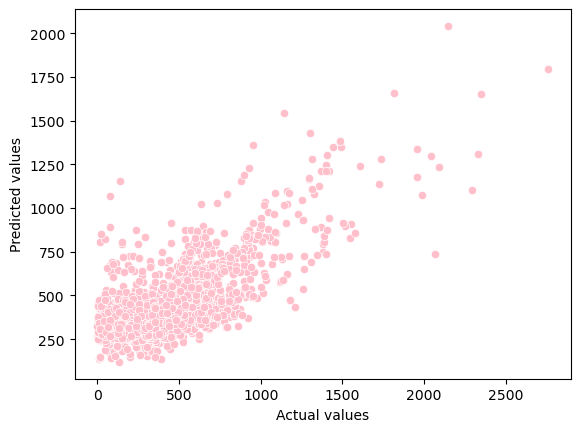

In [11]:
models = [MLPRegressor()]
trained_models = train_models(models, X_train, y_train, X_test, y_test)

for model, R2, MAE, MSE, RMSE in trained_models:
    print(type(model).__name__,':')
    print() 
    print("R2:", R2)
    print("MAE:", MAE)
    print("MSE:", MSE)
    print("RMSE:", RMSE)
    print() 
    
    predictions = model.predict(X_test)
    sns.scatterplot(x=y_test, y=predictions, color='Pink')
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()

With the MLPRegressor I can further define some parameters, for example the hidden layers. I researched a bit on it to understand better.
MLPs consist of an input layer, an output layer, and one or more hidden layers in between. The number of hidden layers determines how deep the neural network is. Each hidden layer consists of nodes (also known as neurons) that transform the input data using weights and biases to produce an output. A higher number of hidden layers allows the neural network to learn more complex representations of the input data, but also increases the risk of overfitting.

### 6. Check and discuss the results.

Key findings:

- KNeighborsRegressor has the lowest R2 score of 0.25, which means it explains only 25% of the variance in the target variable. This suggests that the model is not a good fit for the data and may be underfitting. LinearRegression and MLPRegressor models are a good and a moderate fit respectively.
- The MAE is for MLPRegressor the lowest, followed by LinearRegression, and then KNeighborsRegressor. This means that MLPRegressor on average makes the smallest errors in predicting the target variable.
- With MSE & RMSE, LinearRegression has the lowest values, followed by MLPRegressor, and KNeighborsRegressor has the highest values. This indicates that LinearRegression has the smallest errors overall, while KNeighborsRegressor has the largest errors.

Overall, it appears that the linear regression model is the best choice for this dataset. The same I can observe from the plots, where the dots in the linear model are located the closest to a diagonal.